Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

In [1]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [2]:
# calculating Threshold of 80% for Total of 800 marks.
Threshhold= 800 * 0.8

In [3]:
# Filter for schools with average math score >= 640 (80%)
schools_math_640 = schools[schools["average_math"] >= 640]
schools_math_640

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9


In [4]:
# Select required columns and sort by average_math in descending order
best_math_schools = schools[["school_name", "borough", "average_math"]].sort_values(by="average_math", ascending=False)
best_math_schools

,school_name,borough,average_math
88,Stuyvesant High School,Manhattan,754
170,Bronx High School of Science,Bronx,714
93,Staten Island Technical High School,Staten Island,711
365,Queens High School for the Sciences at York Co...,Queens,701
68,"High School for Mathematics, Science, and Engi...",Manhattan,683
...,...,...,...
337,Pan American International High School,Queens,340
234,Dr. Susan S. McKinney Secondary School of the ...,Brooklyn,332
242,W. H. Maxwell Career and Technical Education H...,Brooklyn,326
247,Multicultural High School,Brooklyn,319


In [5]:
# Filter for schools with average_math >= Threshhold and select required columns
best_math_schools = (
    schools[schools["average_math"] >= Threshhold][["school_name", "average_math"]]
    .sort_values(by="average_math", ascending=False)
    .reset_index(drop=True)
)
best_math_schools

,school_name,average_math
0,Stuyvesant High School,754
1,Bronx High School of Science,714
2,Staten Island Technical High School,711
3,Queens High School for the Sciences at York Co...,701
4,"High School for Mathematics, Science, and Engi...",683
5,Brooklyn Technical High School,682
6,Townsend Harris High School,680
7,High School of American Studies at Lehman College,669
8,"New Explorations into Science, Technology and ...",657
9,Eleanor Roosevelt High School,641


Hence it indicates the Top 10 schools with highest average_math scores in NYC Public schools.

C:\Users\PMLS\AppData\Local\Temp\ipykernel_390524\2552662502.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


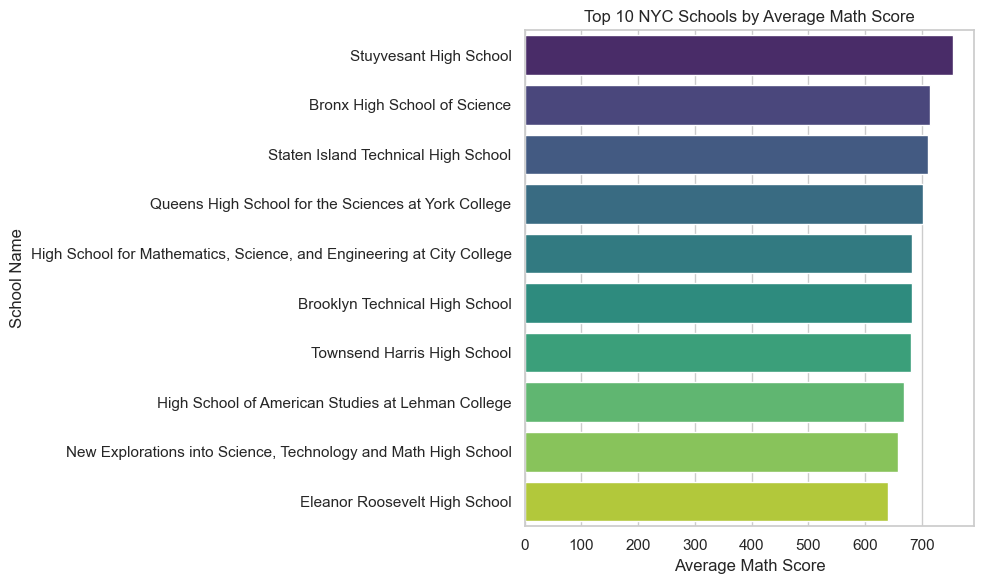

Insight: The schools listed above have the highest average math scores in NYC. These schools demonstrate exceptional performance in mathematics compared to their peers. The top-ranked school(s) stand out with the highest average math scores, indicating strong math programs or student achievement in these institutions.


In [6]:
# let's Visualize it.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the top schools by average_math
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=best_math_schools.head(10),  # Show top 10 schools
    x="average_math",
    y="school_name",
    palette="viridis"
)
plt.xlabel("Average Math Score")
plt.ylabel("School Name")
plt.title("Top 10 NYC Schools by Average Math Score")
plt.tight_layout()
plt.show()

# Insight
print("Insight: The schools listed above have the highest average math scores in NYC. These schools demonstrate exceptional performance in mathematics compared to their peers. The top-ranked school(s) stand out with the highest average math scores, indicating strong math programs or student achievement in these institutions.")

In [7]:
# Create a new column 'total_SAT' as the sum of average_math, average_reading, and average_writing
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


In [8]:
# Select "school_name" and "total_SAT", order by "total_SAT" descending, and get top 10
top_10_schools = (
    schools[["school_name", "total_SAT"]]
    .sort_values(by="total_SAT", ascending=False)
    .head(10)
    .reset_index(drop=True)
)
top_10_schools

,school_name,total_SAT
0,Stuyvesant High School,2144
1,Bronx High School of Science,2041
2,Staten Island Technical High School,2041
3,High School of American Studies at Lehman College,2013
4,Townsend Harris High School,1981
5,Queens High School for the Sciences at York Co...,1947
6,Bard High School Early College,1914
7,Brooklyn Technical High School,1896
8,Eleanor Roosevelt High School,1889
9,"High School for Mathematics, Science, and Engi...",1889


C:\Users\PMLS\AppData\Local\Temp\ipykernel_390524\1232855264.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


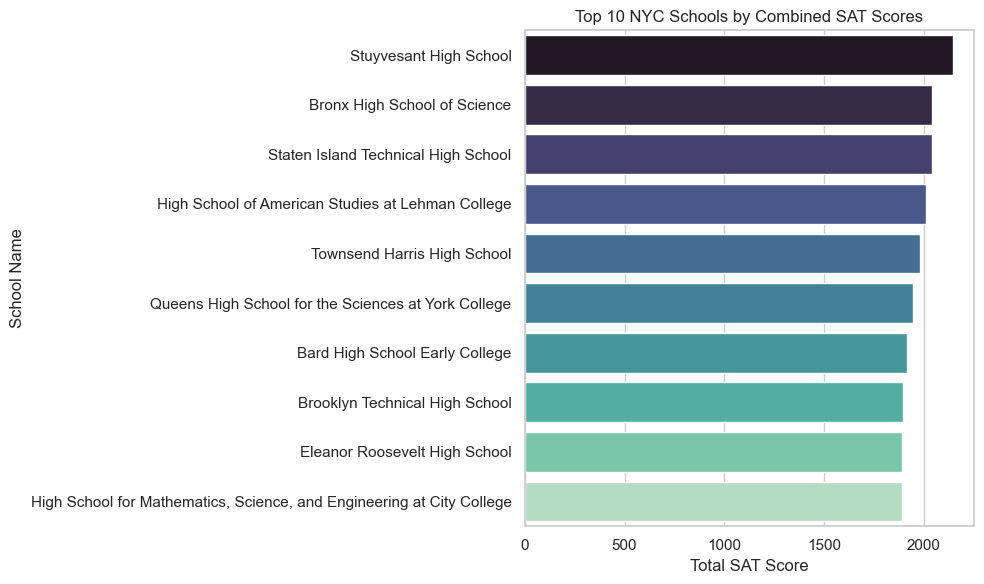

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the top 10 schools by total_SAT
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_10_schools,
    x="total_SAT",
    y="school_name",
    palette="mako"
)
plt.xlabel("Total SAT Score")
plt.ylabel("School Name")
plt.title("Top 10 NYC Schools by Combined SAT Scores")
plt.tight_layout()
plt.show()

Hence above graph indicate that Top school performs well based on SAT Score is Stuyvesant High School Which was also on the top in Average_math score.

In [10]:
# Exploring the Widest Schools Performance gap by Borough
# Group by 'borough' and calculate required statistics
borough_stats = (
    schools.groupby("borough")["total_SAT"]
    .agg(num_schools="count", average_SAT="mean", std_SAT="std")
    .reset_index()
)

# Find the borough with the largest standard deviation
largest_std_row = borough_stats.loc[borough_stats["std_SAT"].idxmax()]

# Create the resulting DataFrame with rounded values
largest_std_dev = pd.DataFrame({
    "borough": [largest_std_row["borough"]],
    "num_schools": [int(largest_std_row["num_schools"])],
    "average_SAT": [round(largest_std_row["average_SAT"], 2)],
    "std_SAT": [round(largest_std_row["std_SAT"], 2)]
})
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


It Indicates that Manhattan is the Borough that has widest gap in School Performance